In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import cv2
import matplotlib.pyplot as plt
import keras.backend as K
from tensorflow.keras.layers import LeakyReLU, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the data from the drive and unpickling 

In [ ]:
# Importing the data from batch files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
batch1=unpickle("/content/drive/Shareddrives/Deep Learning Lab/cifar-10-batches-py/data_batch_1")

In [ ]:
batch2=unpickle("/content/drive/Shareddrives/Deep Learning Lab/cifar-10-batches-py/data_batch_2")

In [ ]:
batch3=unpickle("/content/drive/Shareddrives/Deep Learning Lab/cifar-10-batches-py/data_batch_3")

In [ ]:
batch4=unpickle("/content/drive/Shareddrives/Deep Learning Lab/cifar-10-batches-py/data_batch_4")

In [ ]:
batch5=unpickle("/content/drive/Shareddrives/Deep Learning Lab/cifar-10-batches-py/data_batch_5")

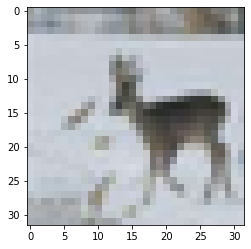

In [ ]:
loaded_images=batch1[b'data']
loaded_images=loaded_images.reshape(len(loaded_images),3,32,32).transpose(0,2,3,1)
plt.imshow(loaded_images[20])

Importing the train and test sets from Tensorflow Datatsets

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
# Printing the shape of the data
print("Training Data Shape:", train_images.shape,train_labels.shape)
print("Testing Data Shape: ",test_images.shape,test_labels.shape)


Training Data Shape: (50000, 32, 32, 3) (50000, 1)
Testing Data Shape:  (10000, 32, 32, 3) (10000, 1)


There are 50,000 entities in the training set and 10,000 entities in the test set.

In [ ]:
print("Number of Classes in Target Variable: ",len(np.unique(train_labels)))

Number of Classes in Target Variable:  10


In [ ]:
image=(train_images[0])
h, w, c = image.shape
print("Image Height:",h)
print("Image Width:",w)
print("Image Channels:",c)

Image Height: 32
Image Width: 32
Image Channels: 3


In [ ]:
values, train_counts=np.unique(train_labels, return_counts=True)
values, test_counts=np.unique(test_labels, return_counts=True)
# print(values,train_counts+test_counts)
for i in values:
  print(i ,":", test_counts[i]+train_counts[i])

0 : 6000
1 : 6000
2 : 6000
3 : 6000
4 : 6000
5 : 6000
6 : 6000
7 : 6000
8 : 6000
9 : 6000


Each class in the dataset contains 6000 instances.

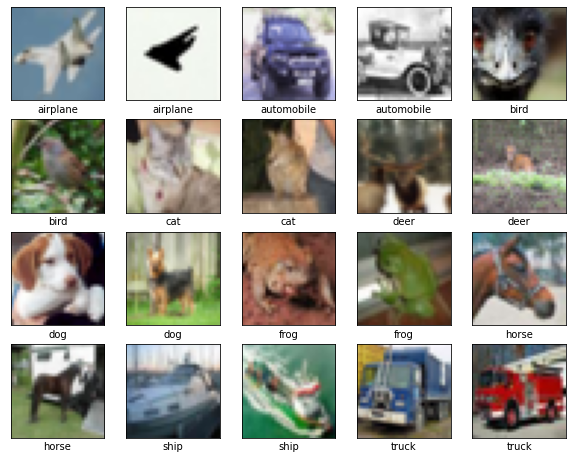

In [ ]:
plt.figure(figsize=(10,10))
images=[]
for i in range(0,len(class_names)):
  x=np.where(test_labels==i)
  images.append(x[0][1])
  images.append(x[0][2])
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[images[i]])
    plt.xlabel(class_names[test_labels[images[i]][0]])
plt.show()

In [ ]:
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [ ]:
input_shape = (32, 32, 3)

train_images=train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 3)
train_images=train_images / 255.0
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 3)
test_images=test_images / 255.0

In [ ]:
train_labels = tf.one_hot(train_labels.astype(np.int32), depth=10)
test_labels = tf.one_hot(test_labels.astype(np.int32), depth=10)

In [ ]:
batch_size = 32
num_classes = 10
epochs = 10

Network Architecture: 


1. Conv2D Layer : Kernel Size = 32
2. Conv2D Layer: Kernel Size = 32
3. Max Pooling Layer
4. Conv2D Layer: Kernel Size = 64
5. Conv2D Layer: Kernel Size = 64
6. Max Pooling Layer
7. Dense Layer: Units = 512
8. Dense Layer: Units = 10 (number of classes)




Model 1: 



1. Activation Function: ReLU: Rectified Linear Unit or ReLU is an activation function which produces as output, the the total input to the neuron or zero. 

> ReLU = max(0,x)

ReLU solves the vanishing gradient problem faced by sigmoid and helps in faster learning.


2. Dropout: 0.2
3. Regularization: L2
4. Optimizer: RMSProp



In [ ]:

# F1 score=2 x [(Precision x Recall) / (Precision + Recall)]
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])


In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy',f1_metric])

In [ ]:
val_images=train_images[-1000:]
val_labels=train_labels[-1000:]

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs, validation_data=(val_images,val_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9979 - accuracy: 0.6669 - f1_metric: 0.6379 - val_loss: 0.8428 - val_accuracy: 0.7260 - val_f1_metric: 0.7024
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9664 - accuracy: 0.6762 - f1_metric: 0.6506 - val_loss: 0.8393 - val_accuracy: 0.7290 - val_f1_metric: 0.7141
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9378 - accuracy: 0.6850 - f1_metric: 0.6638 - val_loss: 0.8210 - val_accuracy: 0.7370 - val_f1_metric: 0.7067
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9160 - accuracy: 0.6938 - f1_metric: 0.6745 - val_loss: 0.7865 - val_accuracy: 0.7410 - val_f1_metric: 0.7327
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8987 - accuracy: 0.6993 - f1_metric: 0.6817 - val_loss: 0.7643 - val_accuracy: 0.7580 - val_f1_metric: 0.7298
Epoch 6/10
1563/1563 [==============================] - 9s 6

In [ ]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'f1_metric', 'val_loss', 'val_accuracy', 'val_f1_metric'])


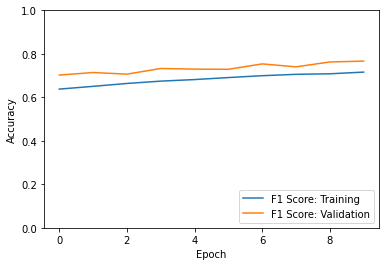

In [ ]:

plt.plot(history1.history['f1_metric'], label='F1 Score: Training')
plt.plot(history1.history['val_f1_metric'], label = 'F1 Score: Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Without Droput:

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9011 - accuracy: 0.4017 - f1_metric: 0.1995 - val_loss: 1.6261 - val_accuracy: 0.4840 - val_f1_metric: 0.3637
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5335 - accuracy: 0.5189 - f1_metric: 0.4058 - val_loss: 1.4013 - val_accuracy: 0.5720 - val_f1_metric: 0.4562
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3685 - accuracy: 0.5661 - f1_metric: 0.4944 - val_loss: 1.2783 - val_accuracy: 0.6190 - val_f1_metric: 0.5406
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2444 - accuracy: 0.6069 - f1_metric: 0.5572 - val_loss: 1.1866 - val_accuracy: 0.6160 - val_f1_metric: 0.5966
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1466 - accuracy: 0.6398 - f1_metric: 0.6017 - val_loss: 1.0200 - val_accuracy: 0.7000 - val_f1_metric: 0.6623
Epoch 6/10
1563/1563 [==============================] - 9s 

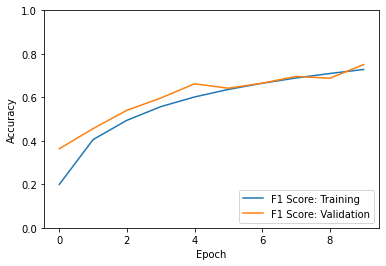

In [ ]:
modelx = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.01)),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])
modelx.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy',f1_metric])
historyx = modelx.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs, validation_data=(val_images,val_labels))

import matplotlib.pyplot as plt
plt.plot(historyx.history['f1_metric'], label='F1 Score: Training')
plt.plot(historyx.history['val_f1_metric'], label = 'F1 Score: Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Model 2:

1. Activation Function: LeakyReLU: The Leaky ReLU function modifies the ReLU slightly to produce an output even the input is negative. 


> Leaky ReLU = max(0.1x,x)

It solves the dying ReLU problem which happens when the neurons become inactive because the ReLU function only produces 0 as an output. 


2. Dropout: 0.2
3. Regularization: L1,L2
4. Optimizer: Adam



In [ ]:

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.Conv2D(32, 3, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation=LeakyReLU(alpha=0.01),kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))),
    tf.keras.layers.Conv2D(64, 3, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])


In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy',f1_metric])

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs, validation_data=(val_images,val_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8508 - accuracy: 0.4002 - f1_metric: 0.2062 - val_loss: 1.5438 - val_accuracy: 0.5040 - val_f1_metric: 0.3352
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5246 - accuracy: 0.4911 - f1_metric: 0.3729 - val_loss: 1.3408 - val_accuracy: 0.5630 - val_f1_metric: 0.4718
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3821 - accuracy: 0.5339 - f1_metric: 0.4474 - val_loss: 1.2197 - val_accuracy: 0.6040 - val_f1_metric: 0.5279
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2844 - accuracy: 0.5678 - f1_metric: 0.4960 - val_loss: 1.1356 - val_accuracy: 0.6290 - val_f1_metric: 0.5726
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2087 - accuracy: 0.5931 - f1_metric: 0.5332 - val_loss: 1.0565 - val_accuracy: 0.6400 - val_f1_metric: 0.6028
Epoch 6/10
1563/1563 [==============================] - 8s 5

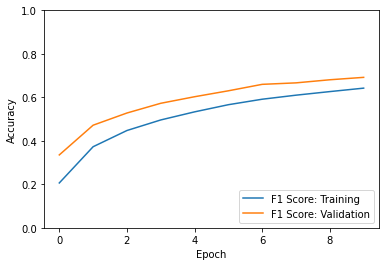

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['f1_metric'], label='F1 Score: Training')
plt.plot(history2.history['val_f1_metric'], label = 'F1 Score: Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Without Dropout:

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9600 - accuracy: 0.4197 - f1_metric: 0.2407 - val_loss: 1.5740 - val_accuracy: 0.5140 - val_f1_metric: 0.4092
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4921 - accuracy: 0.5420 - f1_metric: 0.4491 - val_loss: 1.3873 - val_accuracy: 0.5850 - val_f1_metric: 0.5013
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3116 - accuracy: 0.5961 - f1_metric: 0.5371 - val_loss: 1.1782 - val_accuracy: 0.6390 - val_f1_metric: 0.5997
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1858 - accuracy: 0.6349 - f1_metric: 0.5925 - val_loss: 1.0902 - val_accuracy: 0.6600 - val_f1_metric: 0.6304
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0894 - accuracy: 0.6647 - f1_metric: 0.6337 - val_loss: 0.9970 - val_accuracy: 0.6900 - val_f1_metric: 0.6631
Epoch 6/10
1563/1563 [==============================] - 9

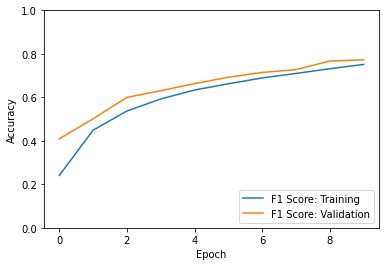

In [ ]:

modelx = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.Conv2D(32, 3, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.MaxPooling2D(),
   

    tf.keras.layers.Conv2D(64, 3, padding='same', activation=LeakyReLU(alpha=0.01),kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Conv2D(64, 3, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.MaxPooling2D(),
    

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

modelx.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy',f1_metric])

historyx = modelx.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs, validation_data=(val_images,val_labels))


plt.plot(historyx.history['f1_metric'], label='F1 Score: Training')
plt.plot(historyx.history['val_f1_metric'], label = 'F1 Score: Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Model 3:

1. Activation Function: Tanh: The Tanh function produces an output in the range (-1,1) as opposed to sigmoid which produces output in the range of (0,1)


> Tanh = tanh(x)

The gradient of tanh is greater than that of sigmoid which results in greater values of gradients when training the network and higher weight updates as well.


2. Dropout: 0.3
3. Regularization: L1, L2
4. Optimizer: Adamax



In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='tanh'),
    tf.keras.layers.Conv2D(32, 3, activation='tanh'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='tanh',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Conv2D(64, 3, activation='tanh'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])


In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy',f1_metric])

In [ ]:
history3 = model3.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs, validation_data=(val_images,val_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.5126 - accuracy: 0.3328 - f1_metric: 0.1014 - val_loss: 2.1391 - val_accuracy: 0.4300 - val_f1_metric: 0.2086
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0288 - accuracy: 0.4271 - f1_metric: 0.2345 - val_loss: 1.8396 - val_accuracy: 0.4810 - val_f1_metric: 0.3053
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8032 - accuracy: 0.4643 - f1_metric: 0.3074 - val_loss: 1.6542 - val_accuracy: 0.5140 - val_f1_metric: 0.3523
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6593 - accuracy: 0.4949 - f1_metric: 0.3581 - val_loss: 1.5446 - val_accuracy: 0.5280 - val_f1_metric: 0.4045
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5626 - accuracy: 0.5123 - f1_metric: 0.3992 - val_loss: 1.4950 - val_accuracy: 0.5340 - val_f1_metric: 0.4294
Epoch 6/10
1563/1563 [==============================] - 10s

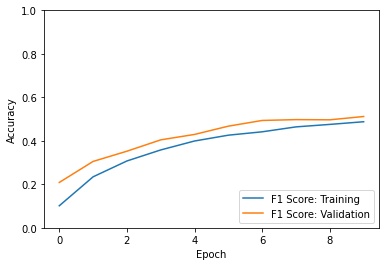

In [ ]:

plt.plot(history3.history['f1_metric'], label='F1 Score: Training')
plt.plot(history3.history['val_f1_metric'], label = 'F1 Score: Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Without Dropout:

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3949 - accuracy: 0.3957 - f1_metric: 0.1642 - val_loss: 2.0938 - val_accuracy: 0.4680 - val_f1_metric: 0.2983
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9961 - accuracy: 0.4825 - f1_metric: 0.3209 - val_loss: 1.8632 - val_accuracy: 0.5130 - val_f1_metric: 0.4084
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8027 - accuracy: 0.5228 - f1_metric: 0.4030 - val_loss: 1.6897 - val_accuracy: 0.5670 - val_f1_metric: 0.4593
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6725 - accuracy: 0.5541 - f1_metric: 0.4591 - val_loss: 1.5976 - val_accuracy: 0.5710 - val_f1_metric: 0.4901
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5721 - accuracy: 0.5758 - f1_metric: 0.4979 - val_loss: 1.5013 - val_accuracy: 0.5860 - val_f1_metric: 0.5325
Epoch 6/10
1563/1563 [==============================] - 

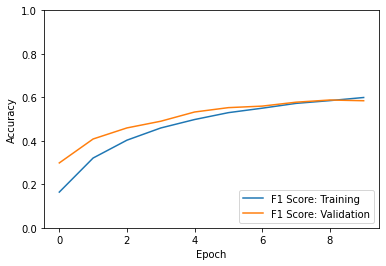

In [ ]:
modelx = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='tanh'),
    tf.keras.layers.Conv2D(32, 3, activation='tanh'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='tanh',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4)),
    tf.keras.layers.Conv2D(64, 3, activation='tanh'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

modelx.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy',f1_metric])

historyx = modelx.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs, validation_data=(val_images,val_labels))

plt.plot(historyx.history['f1_metric'], label='F1 Score: Training')
plt.plot(historyx.history['val_f1_metric'], label = 'F1 Score: Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Model 4:

1. Activation Function: Sigmoid: The Sigmoid or Logistic function produces output in the range (0,1).


> Sigmoid = 1/(1 + e^-x)

The problem with the sigmoid function is that during backpropagation in deep neural networks, the partial differential of the function decreases exponentially and the error comes very close to zero which results in the weights not being updated properly. This is known as the vanishing graddient problem.


2. Dropout: 0.3
3. Regularization: L2
4. Optimizer: SGD



In [ ]:
model4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.02)),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])


In [ ]:
model4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_41 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_42 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 64)        36928     
                                                     

In [ ]:
model4.compile(optimizer='SGD',
            loss='categorical_crossentropy', metrics=['accuracy',f1_metric])

In [ ]:
history4 = model4.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs, validation_data=(val_images,val_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.5868 - accuracy: 0.2137 - f1_metric: 0.0146 - val_loss: 2.1631 - val_accuracy: 0.3110 - val_f1_metric: 0.0314
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0009 - accuracy: 0.3279 - f1_metric: 0.0843 - val_loss: 1.7985 - val_accuracy: 0.3830 - val_f1_metric: 0.1554
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7049 - accuracy: 0.3978 - f1_metric: 0.2072 - val_loss: 1.6565 - val_accuracy: 0.4310 - val_f1_metric: 0.2135
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5521 - accuracy: 0.4485 - f1_metric: 0.2977 - val_loss: 1.3722 - val_accuracy: 0.5100 - val_f1_metric: 0.3801
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4557 - accuracy: 0.4836 - f1_metric: 0.3641 - val_loss: 1.3210 - val_accuracy: 0.5410 - val_f1_metric: 0.4405
Epoch 6/10
1563/1563 [==============================] - 8s 5

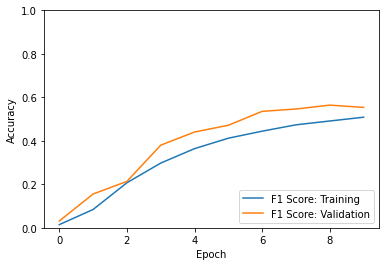

In [ ]:

plt.plot(history4.history['f1_metric'], label='F1 Score: Training')
plt.plot(history4.history['val_f1_metric'], label = 'F1 Score: Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Without Dropout:

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.4519 - accuracy: 0.2944 - f1_metric: 0.0639 - val_loss: 2.0509 - val_accuracy: 0.3640 - val_f1_metric: 0.1843
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7456 - accuracy: 0.4359 - f1_metric: 0.2685 - val_loss: 1.5387 - val_accuracy: 0.4800 - val_f1_metric: 0.3713
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4852 - accuracy: 0.4940 - f1_metric: 0.3817 - val_loss: 1.4610 - val_accuracy: 0.5010 - val_f1_metric: 0.4101
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3546 - accuracy: 0.5353 - f1_metric: 0.4489 - val_loss: 1.3587 - val_accuracy: 0.5260 - val_f1_metric: 0.4438
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2610 - accuracy: 0.5659 - f1_metric: 0.4996 - val_loss: 1.2336 - val_accuracy: 0.5830 - val_f1_metric: 0.5230
Epoch 6/10
1563/1563 [==============================] - 8s 5

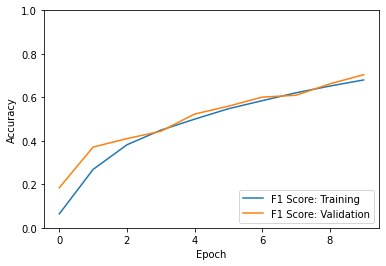

In [ ]:
modelx = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=train_images.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer =tf.keras.regularizers.l2( l=0.02)),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

modelx.compile(optimizer='SGD',
            loss='categorical_crossentropy', metrics=['accuracy',f1_metric])

historyx = modelx.fit(train_images, train_labels, batch_size=batch_size,
                    epochs=epochs, validation_data=(val_images,val_labels))

plt.plot(historyx.history['f1_metric'], label='F1 Score: Training')
plt.plot(historyx.history['val_f1_metric'], label = 'F1 Score: Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Total Trainable Parameters: (32 * 3 * 3 * 3) + 32 = 896 Parameters